In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Import regression model csv
# multiple_linear_regression_df = pd.read_csv("../resources/regression_ml_model/merged_internet_access.csv")
multiple_linear_regression_df = pd.read_csv("../resources/regression_ml_model/scaled_merged_internet_access.csv")
multiple_linear_regression_df.head()

,geo_id,county_name,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,0500000US06033,Lake County,64148,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,...,0.054811,0.050368,0.108702,0.104540,0.126224,0.080080,0.086363,0.133925,0.061966,0.021435
1,0500000US06043,Mariposa County,17540,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,...,0.045838,0.045781,0.107469,0.092018,0.130217,0.085690,0.095952,0.158381,0.088712,0.020296
2,0500000US06115,Yuba County,75493,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,...,0.065635,0.074179,0.158028,0.121773,0.111401,0.060827,0.052998,0.074802,0.030612,0.014796
3,0500000US06013,Contra Costa County,1133247,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,...,0.064290,0.060016,0.126886,0.133848,0.144896,0.069586,0.061063,0.087833,0.042855,0.019131
4,0500000US06035,Lassen County,31185,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,...,0.046304,0.103191,0.201603,0.139586,0.125028,0.057816,0.060638,0.080295,0.040083,0.012923


In [3]:
# Seperate the features and target
y = multiple_linear_regression_df['level_up_access_pop_percent']
multiple_linear_regression_df.drop(['geo_id', 'county_name', 'population'], axis = 1, inplace = True)
x = multiple_linear_regression_df

In [4]:
y

0     0.880890
1     0.407778
2     0.758733
3     0.976652
4     0.517515
5     0.926085
6     0.950289
7     0.851398
8     0.827887
9     0.989920
10    0.960342
11    0.915771
12    0.894943
13    0.020300
14    0.978077
15    0.868299
16    0.947211
17    0.116918
18    0.839894
19    0.990897
20    0.994450
21    0.968307
22    0.994040
23    0.942896
24    0.678036
25    0.764138
26    0.935783
27    0.652872
28    0.878172
29    0.118573
30    0.887511
31    0.900024
32    0.985492
33    0.812635
34    0.908261
35    0.997575
36    0.989464
37    0.913872
38    0.325451
39    0.803120
40    0.160163
41    0.834414
42    0.932441
43    0.488845
44    0.887551
45    0.747346
46    0.999949
47    0.804800
48    0.707463
49    0.752814
50    0.234107
51    0.948375
52    0.872089
53    0.915178
54    0.398385
55    0.768494
56    0.852490
57    0.984514
Name: level_up_access_pop_percent, dtype: float64

In [5]:
x

,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,2.43,0.880890,0.496960,0.503040,0.200006,0.799994,0.032581,0.010008,0.022230,0.000468,...,0.054811,0.050368,0.108702,0.104540,0.126224,0.080080,0.086363,0.133925,0.061966,0.021435
1,2.13,0.407778,0.508552,0.491448,0.108837,0.891163,0.022235,0.013854,0.009464,0.003079,...,0.045838,0.045781,0.107469,0.092018,0.130217,0.085690,0.095952,0.158381,0.088712,0.020296
2,2.83,0.758733,0.509557,0.490443,0.278039,0.721961,0.008517,0.065927,0.030996,0.003868,...,0.065635,0.074179,0.158028,0.121773,0.111401,0.060827,0.052998,0.074802,0.030612,0.014796
3,2.86,0.976652,0.488597,0.511403,0.254226,0.745774,0.002097,0.160720,0.082668,0.004634,...,0.064290,0.060016,0.126886,0.133848,0.144896,0.069586,0.061063,0.087833,0.042855,0.019131
4,2.23,0.517515,0.662851,0.337149,0.187077,0.812923,0.027160,0.013981,0.086420,0.006574,...,0.046304,0.103191,0.201603,0.139586,0.125028,0.057816,0.060638,0.080295,0.040083,0.012923
5,2.92,0.926085,0.500764,0.499236,0.450852,0.549148,0.003171,0.051823,0.017760,0.001086,...,0.084385,0.111383,0.132903,0.112959,0.112589,0.058336,0.054302,0.078968,0.044713,0.022295
6,2.60,0.950289,0.489104,0.510896,0.265271,0.734729,0.004125,0.039336,0.014346,0.002805,...,0.059687,0.060122,0.130490,0.123207,0.132509,0.071185,0.074949,0.110748,0.047786,0.023181
7,3.87,0.851398,0.511886,0.488114,0.837989,0.162011,0.005971,0.013184,0.021674,0.001704,...,0.075332,0.077718,0.145437,0.121149,0.114113,0.052914,0.048542,0.068962,0.038726,0.016863
8,2.86,0.827887,0.517920,0.482080,0.272753,0.727247,0.024129,0.023705,0.002822,0.000000,...,0.044448,0.094610,0.159729,0.110272,0.138564,0.092705,0.063990,0.097714,0.040073,0.005432
9,2.81,0.989920,0.491070,0.508930,0.224531,0.775469,0.003217,0.293890,0.104842,0.008026,...,0.057106,0.063092,0.165399,0.148784,0.136586,0.064765,0.056641,0.077155,0.037080,0.017125


In [6]:
corr_df = multiple_linear_regression_df.corr()
# corr_df.to_csv("../resources/regression_ml_model/correlation_table.csv")
corr_df.to_csv("../resources/regression_ml_model/scaled_correlation_table.csv")
corr_df

,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
avg_household_size,1.000000,0.274861,-0.150340,0.150340,0.808490,-0.808490,0.026809,0.156543,0.214196,-0.052516,...,0.699173,0.378149,0.282023,0.406787,-0.156478,-0.551007,-0.656668,-0.645281,-0.692125,-0.518306
level_up_access_pop_percent,0.274861,1.000000,-0.373077,0.373077,0.327056,-0.327056,-0.412588,0.475098,0.323126,0.132693,...,0.136413,0.434457,0.511085,0.399370,0.455465,-0.487181,-0.497686,-0.649700,-0.629134,-0.232779
sex_total_men,-0.150340,-0.373077,1.000000,-1.000000,-0.082357,0.082357,0.230264,-0.223227,0.137295,0.017602,...,-0.212038,0.103463,0.254320,0.129572,-0.206531,0.022181,0.014175,0.050135,0.033830,-0.110721
sex_total_women,0.150340,0.373077,-1.000000,1.000000,0.082357,-0.082357,-0.230264,0.223227,-0.137295,-0.017602,...,0.212038,-0.103463,-0.254320,-0.129572,0.206531,-0.022181,-0.014175,-0.050135,-0.033830,0.110721
race_hispanic_or_latino,0.808490,0.327056,-0.082357,0.082357,1.000000,-1.000000,-0.300036,0.012014,0.182701,-0.106698,...,0.565844,0.401307,0.399238,0.325702,-0.048657,-0.539922,-0.754679,-0.748298,-0.692805,-0.613565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
age_55-59,-0.551007,-0.487181,0.022181,-0.022181,-0.539922,0.539922,0.043236,-0.295141,-0.351802,-0.152489,...,-0.527091,-0.524850,-0.597554,-0.342456,-0.090342,1.000000,0.475694,0.713610,0.750513,0.295221
age_60-64,-0.656668,-0.497686,0.014175,-0.014175,-0.754679,0.754679,0.404048,-0.385291,-0.393864,-0.026419,...,-0.432706,-0.569339,-0.661580,-0.664455,-0.019045,0.475694,1.000000,0.915909,0.817046,0.706187
age_65-74,-0.645281,-0.649700,0.050135,-0.050135,-0.748298,0.748298,0.410731,-0.455738,-0.472693,-0.162843,...,-0.443467,-0.635827,-0.770630,-0.640569,-0.194005,0.713610,0.915909,1.000000,0.929748,0.717206
age_75-84,-0.692125,-0.629134,0.033830,-0.033830,-0.692805,0.692805,0.241251,-0.378188,-0.454062,-0.116570,...,-0.509778,-0.662144,-0.723665,-0.604177,-0.116007,0.750513,0.817046,0.929748,1.000000,0.665815


In [7]:
multiple_linear_regression_df.drop(['level_up_access_pop_percent'], axis = 1, inplace = True)
x = multiple_linear_regression_df

In [8]:
# Define the multiple linear regression model
model = LinearRegression().fit(x,y)

In [9]:
# Fit the model
model

LinearRegression()

In [10]:
# predict with the data
y_pred = model.predict(x)
y_pred

array([0.88089026, 0.40777771, 0.7587329 , 0.97665151, 0.51751545,
       0.92608494, 0.95028887, 0.85139751, 0.82788701, 0.98992   ,
       0.96034159, 0.91577129, 0.89494334, 0.0202995 , 0.97807736,
       0.86829932, 0.94721079, 0.11691763, 0.83989441, 0.99089721,
       0.9944504 , 0.9683069 , 0.99404   , 0.942896  , 0.67803578,
       0.76413816, 0.93578312, 0.65287219, 0.87817196, 0.11857287,
       0.88751055, 0.90002411, 0.9854923 , 0.81263479, 0.90826123,
       0.99757492, 0.98946364, 0.91387169, 0.32545093, 0.80312017,
       0.16016288, 0.83441432, 0.93244107, 0.48884518, 0.88755135,
       0.74734626, 0.99994895, 0.80479973, 0.70746328, 0.7528142 ,
       0.23410663, 0.94837512, 0.87208905, 0.91517756, 0.39838493,
       0.76849388, 0.85249036, 0.98451429])

In [11]:
model.score(x,y)

1.0

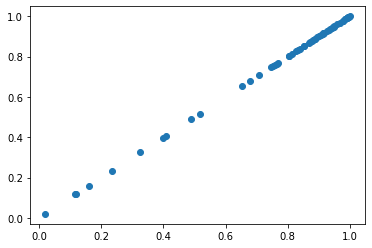

In [12]:
# Visualize Regression
residuals = (y - y_pred)
plt.scatter(y_pred, y)
plt.show()